# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
import os
import string

# get data file names

In [2]:
def fresh(path):
    files = os.listdir(path)
    files_name = [i.split('.')[0]for i in files]
    filesss = [os.path.join(path, fname) for fname in os.listdir(path)]

    food_type = []
    frame = []
    food_name = []
    for i in range(0,len(files)): 
        data = pd.read_excel(filesss[i], header = 1).dropna(subset=['Form'])
        #data = data.fillna('hello')
        data = pd.DataFrame(data[data.iloc[:,0].str.startswith('Fresh')])
        if(not(data[data.iloc[:,0].str.startswith('Fresh')]).empty):
            for c in range(len(data)):
                x= files_name[i]
                food_name.append(x)  
                #extract type(food/vegetables) from the folders
                food_type.append(filesss[i].split("\\")[0].split("/")[-1])


        frame.append(data)
    
    data = pd.concat(frame)
    food_name = pd.DataFrame(food_name)
    food_type = pd.DataFrame(food_type)
    return data, food_name,(food_type)

In [3]:
#print fresh(path)
fruit_path =r'C:/Users/Soloman/Desktop/uc davis/2017 winter quarter/sta 141b/assignment3/fruit'

fruitname,fruitdata,fruittype = fresh(fruit_path)

#input fruit type and fruit into frame
fruitname['food'] = fruitdata.values
fruitname['type'] = fruittype.values

In [4]:
#drop columns that we do not need
newframe= fruitname.drop(fruitname.columns[[5,6,7,8]], axis=1) 
newframe.columns.values[0:5] = ["price_per_cup","price_per_lb","form","yield","lb_per_cup"]
newframe

,price_per_cup,price_per_lb,form,yield,lb_per_cup,food,type
1,0.422373,1.56752,Fresh1,0.9,0.242508,apples,fruit
1,1.1891,3.04007,Fresh1,0.93,0.363763,apricots,fruit
1,0.292965,0.566983,Fresh1,0.64,0.330693,bananas,fruit
1,1.92292,5.77471,Fresh1,0.96,0.31967,blackberries,fruit
1,1.59318,4.73462,Fresh1,0.95,0.31967,blueberries,fruit
1,0.3938,0.535874,Fresh1,0.51,0.374786,cantaloupe,fruit
1,1.33455,3.59299,Fresh1,0.92,0.341717,cherries,fruit
1,0.848278,0.897802,Fresh1,0.49,0.462971,grapefruit,fruit
1,0.721266,2.09383,Fresh1,0.96,0.330693,grapes,fruit
1,0.649077,0.796656,Fresh1,0.46,0.374786,honeydew,fruit


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [5]:
veggie_path =r'C:/Users/Soloman/Desktop/uc davis/2017 winter quarter/sta 141b/assignment3/vegetables'
#combine frame with vegetables types and name
frame2,  veggiename, veggietype= fresh(veggie_path)
frame2['food'] = veggiename.values
frame2['type'] = veggietype.values
#print frame2
#len(frame2),len(veggiename)
frame2= frame2.drop(frame2.columns[[5,6,7,8]], axis=1)
frame2.columns.values[0:5] = ["price_per_cup","price_per_lb","form","yield","lb_per_cup"]
frame2

,price_per_cup,price_per_lb,form,yield,lb_per_cup,food,type
1,1.15536,1.17225,Fresh1,0.458554,0.451948,acorn_squash,vegetables
1,2.27497,2.21305,Fresh1,0.375309,0.385809,artichoke,vegetables
1,2.58227,3.21349,Fresh1,0.493835,0.396832,asparagus,vegetables
1,0.964886,2.23587,Fresh1,0.740753,0.31967,avocados,vegetables
1,NaN,,Fresh,,,broccoli,vegetables
1,0.890898,2.76355,Fresh1,1.06,0.341717,brussels_sprouts,vegetables
1,0.787893,1.24474,Fresh1,0.714,0.451948,butternut_squash,vegetables
1,0.245944,0.579208,Fresh green cabbage1,0.778797,0.330693,cabbage,vegetables
2,0.448412,1.05645,Fresh red cabbage1,0.779107,0.330693,cabbage,vegetables
1,NaN,NaN,Fresh,NaN,NaN,carrots,vegetables


#tomato has name "Fresh" but it does not have any price and information related to that. All the other files that do not have certain values will end up having Nah


__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [6]:
frame2WONA = newframe.append(frame2.dropna()).reset_index(drop = True)
frame2WONA

,price_per_cup,price_per_lb,form,yield,lb_per_cup,food,type
0,0.422373,1.56752,Fresh1,0.9,0.242508,apples,fruit
1,1.1891,3.04007,Fresh1,0.93,0.363763,apricots,fruit
2,0.292965,0.566983,Fresh1,0.64,0.330693,bananas,fruit
3,1.92292,5.77471,Fresh1,0.96,0.31967,blackberries,fruit
4,1.59318,4.73462,Fresh1,0.95,0.31967,blueberries,fruit
5,0.3938,0.535874,Fresh1,0.51,0.374786,cantaloupe,fruit
6,1.33455,3.59299,Fresh1,0.92,0.341717,cherries,fruit
7,0.848278,0.897802,Fresh1,0.49,0.462971,grapefruit,fruit
8,0.721266,2.09383,Fresh1,0.96,0.330693,grapes,fruit
9,0.649077,0.796656,Fresh1,0.46,0.374786,honeydew,fruit


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

In [278]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")

frame2WONA.loc[frame2WONA['price_per_lb'].idxmax()]

form                 2.32287
price_per_lb         6.97581
yield                 Fresh1
lb_per_cup              0.96
price_per_cup        0.31967
food             raspberries
type                   fruit
Name: 20, dtype: object

In [279]:
frame2WONA.loc[frame2WONA['price_per_lb'].idxmin()]
#reference: http://stackoverflow.com/questions/15741759/find-maximum-value-of-a-column-and-return-the-corresponding-row-values-using-pan

form               0.212033
price_per_lb       0.333412
yield                Fresh1
lb_per_cup             0.52
price_per_cup      0.330693
food             watermelon
type                  fruit
Name: 23, dtype: object

#I check the price per lb to determine the cost, from the result, I find that watermelon are cheapest and raspberries 
are most expensive in terms of price in fruit. In addition, it is also the most expensive out of all the food

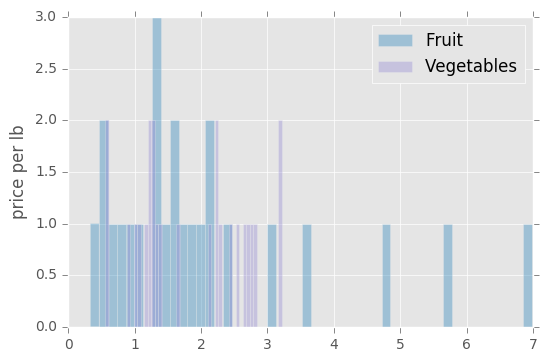

In [12]:
plt.hist(frame2WONA[frame2WONA["type"]=="fruit"]["price_per_lb"], bins = 50,  alpha = .4, label = "Fruit")
plt.hist(frame2WONA[frame2WONA["type"]=="vegetables"]["price_per_lb"], bins = 50,  alpha = .4, label ="Vegetables")
plt.ylabel("price per lb")
plt.legend()
plt.show()

From the distribution plot above, most vegetables are around $1, same apply to fruit; however, fruit has outlier that is way greater than 1; as a result, fruit is more expansive.It is surprising most food cost about $1 each especially as it is the median of all the food

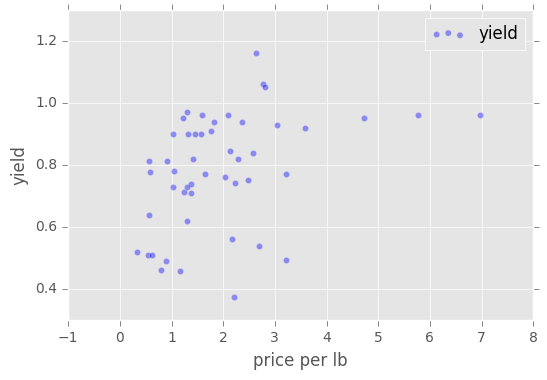

In [15]:
plt.scatter(frame2WONA["price_per_lb"],frame2WONA["yield"],alpha = .4)
plt.xlabel("price per lb")
plt.ylabel("yield")

plt.legend()
plt.show()

As we do not know how to determine the nutrition of the food, I create a scatter plot to look at the correlation between price and yield and I find that there is a positive correlation where yield is high when price is high. It shows that food cost more as it takes more time to prepare. I make an assumption that food that takes more time to prepare supposes to be more nutritious. As a result, I look at the data and assume raspberry is the best. However, we do not have enough data to support this assumption.